In [12]:
import pandas as pd
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from plotnine import *
from itables import show
import pyarrow

tips = sns.load_dataset('tips')

In [13]:
tips_polars = pl.from_pandas(tips)

ImportError: pyarrow is required for converting a pandas dataframe to Polars, unless each of its columns is a simple numpy-backed one (e.g. 'int64', 'bool', 'float32' - not 'Int64')

In [14]:
tips.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [17]:
tips.describe()
tips.info()
tips.mean()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


TypeError: 'Categorical' with dtype category does not support operation 'mean'

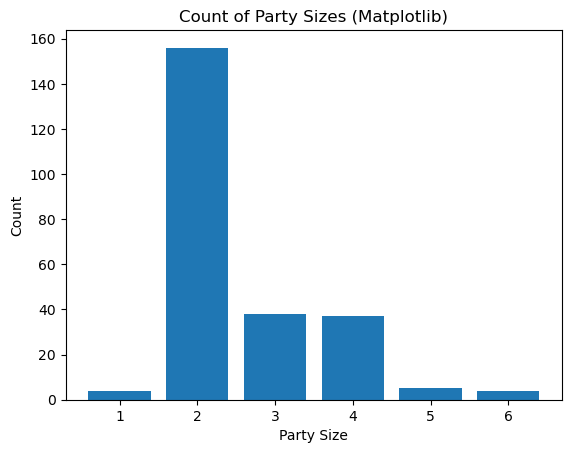

In [22]:
# 1. Prepare data: Count the occurrences of each party size
size_counts = tips['size'].value_counts()

# 2. Plot
plt.bar(size_counts.index, size_counts.values)
plt.xlabel('Party Size')
plt.ylabel('Count')
plt.title('Count of Party Sizes (Matplotlib)')
plt.show()

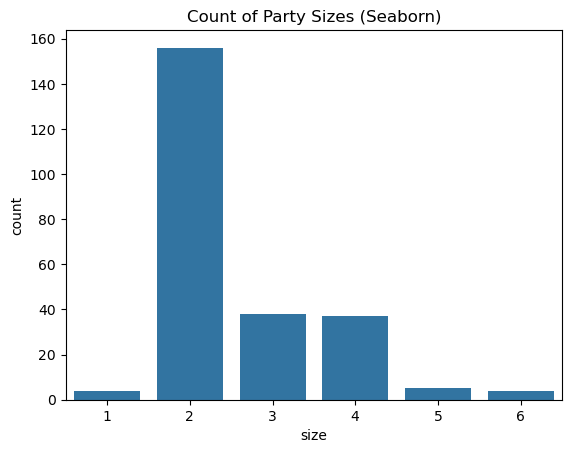

In [23]:
sns.countplot(data=tips, x='size')
plt.title('Count of Party Sizes (Seaborn)')
plt.show()

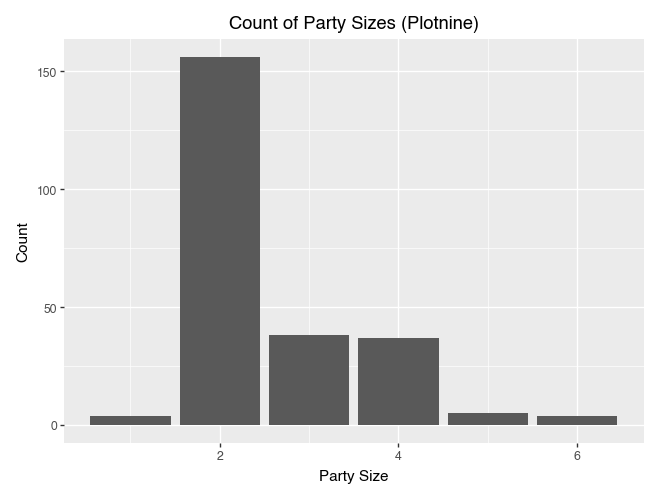

In [24]:
(
    ggplot(tips, aes(x='size')) 
    + geom_bar() 
    + labs(title='Count of Party Sizes (Plotnine)', x='Party Size', y='Count')
)

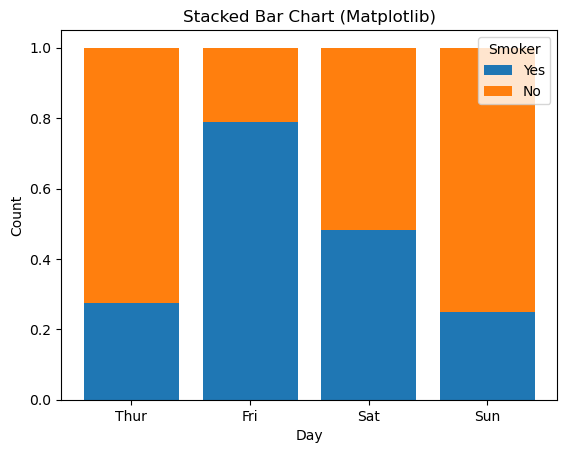

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')

# 1. Prepare Data: Cross-tabulate to get counts of smoker vs day
# We reindex to ensure days are in logical order, not alphabetical
days_order = ['Thur', 'Fri', 'Sat', 'Sun']
ct = pd.crosstab(tips['day'], tips['smoker'], normalize='index').reindex(days_order)

# 2. Plot
# Plot the first category ('Yes')
plt.bar(ct.index, ct['Yes'], label='Yes')

# Plot the second category ('No') on top of the first using 'bottom'
plt.bar(ct.index, ct['No'], bottom=ct['Yes'], label='No')

plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.title('Stacked Bar Chart (Matplotlib)')
plt.show()

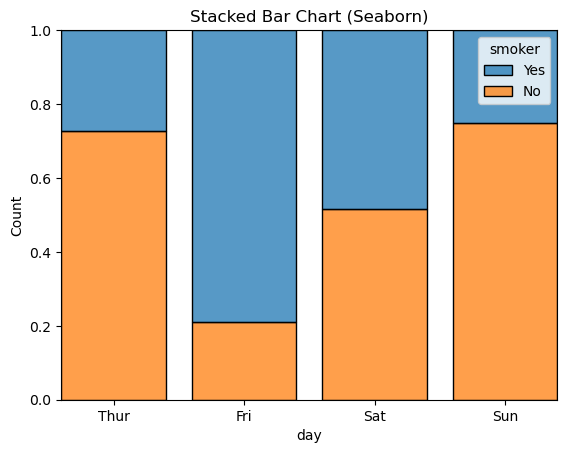

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

# hue='smoker' breaks it down, multiple='stack' stacks them
sns.histplot(
    data=tips, 
    x='day', 
    hue='smoker', 
    multiple='fill',
    shrink=0.8  # Makes bars slightly thinner so they look like bars, not a histogram
)

plt.title('Stacked Bar Chart (Seaborn)')
plt.show()

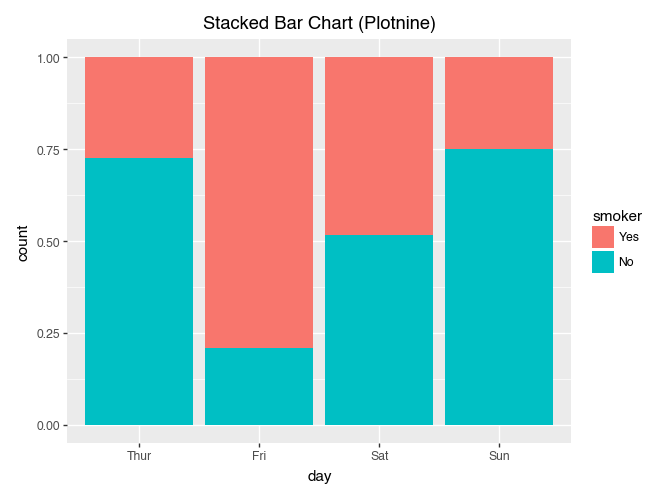

In [32]:
from plotnine import *

# We force the 'day' column to be an ordered categorical type 
# so the bars sort by day of week (Thur-Sun) instead of alphabetically (Fri-Thur)
tips['day'] = pd.Categorical(tips['day'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

(
    ggplot(tips, aes(x='day', fill='smoker'))
    + geom_bar(position="fill") # Default position is 'stack'
    + labs(title='Stacked Bar Chart (Plotnine)')
)

<positron-console-cell-35>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


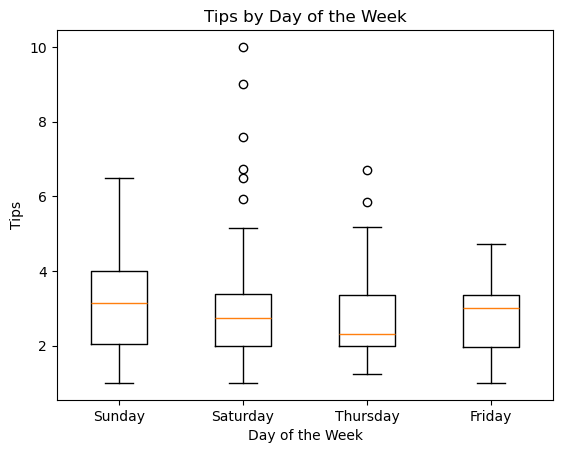

<positron-console-cell-35>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


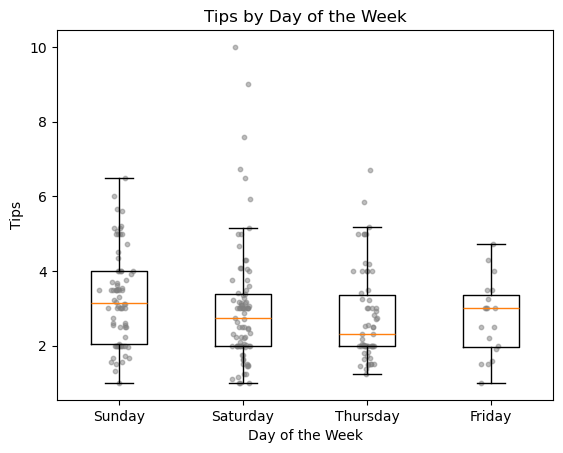

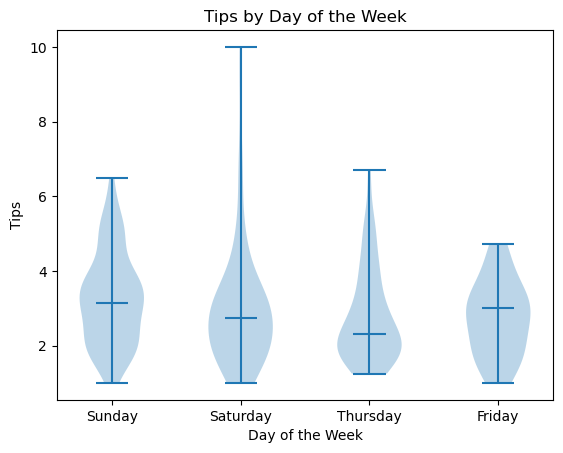

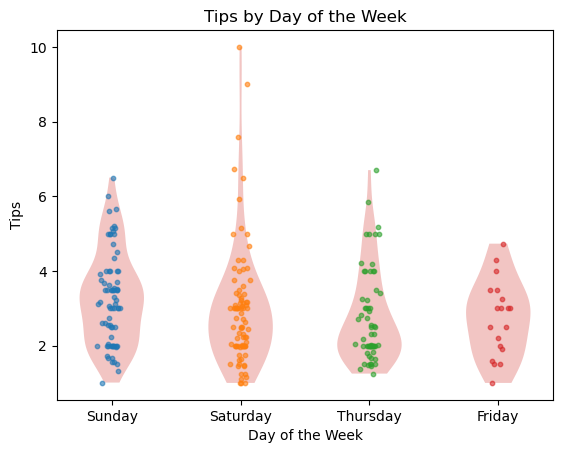

In [35]:
import numpy as np
tips = pd.read_csv("../data/tips.csv")
# Prepare data: Create a list of 'Tip' arrays, one for each 'Weekday'
days = tips['Weekday'].unique()
data_by_day = [tips[tips['Weekday'] == d]['Tip'] for d in days]

# --- Plot 1: Boxplot ---
plt.figure()
plt.boxplot(data_by_day, labels=days)
plt.title("Tips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Tips")
plt.show()

# --- Plot 2: Boxplot + Jitter ---
plt.figure()
plt.boxplot(data_by_day, labels=days, showfliers=False) # Hide outliers to avoid dupes
# Add jitter manually
for i, d in enumerate(days):
    y = tips[tips['Weekday'] == d]['Tip']
    x = np.random.normal(i + 1, 0.04, size=len(y)) # i+1 because boxplot is 1-indexed
    plt.scatter(x, y, alpha=0.5, s=10, color='grey')
plt.title("Tips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Tips")
plt.show()

# --- Plot 3: Violin ---
plt.figure()
plt.violinplot(data_by_day, showmeans=False, showmedians=True)
plt.xticks(ticks=range(1, len(days) + 1), labels=days)
plt.title("Tips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Tips")
plt.show()

# --- Plot 4: Sina Plot Approximation ---
# Matplotlib has no native Sina plot. 
# A common approximation is a Violin plot with inner points (or a swarm plot).
# Here we just show the violin (density) with scatter overlay.
plt.figure()
parts = plt.violinplot(data_by_day, showextrema=False)
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_alpha(0.3)
for i, d in enumerate(days):
    y = tips[tips['Weekday'] == d]['Tip']
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.6, s=10)
plt.xticks(ticks=range(1, len(days) + 1), labels=days)
plt.title("Tips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Tips")
plt.show()

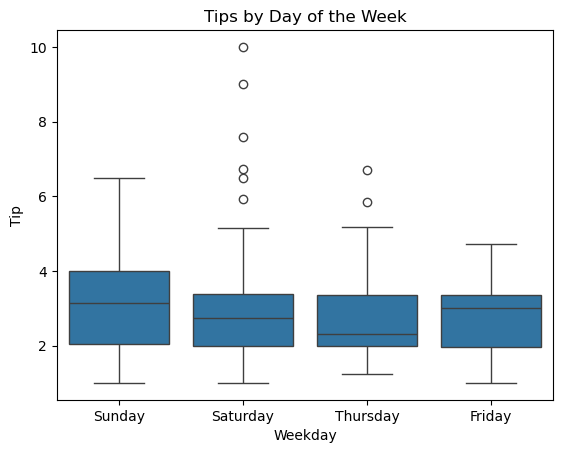

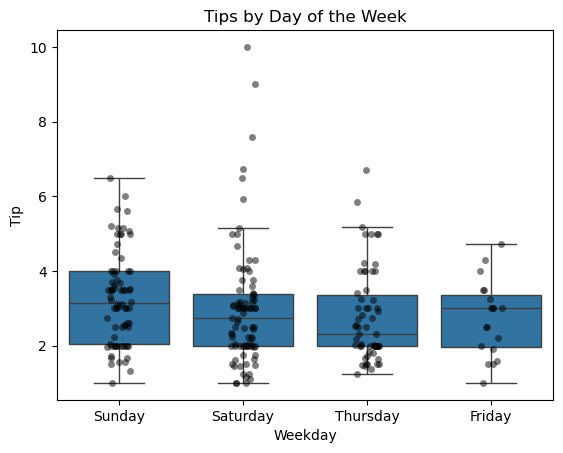

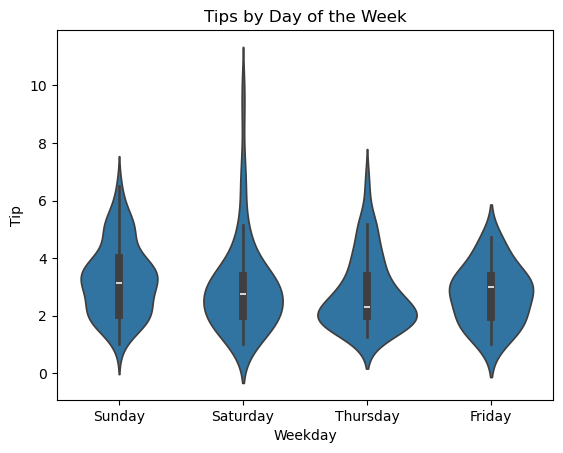

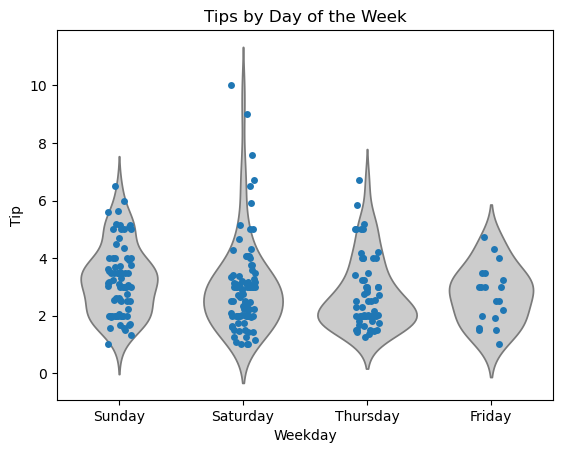

In [36]:
# --- Plot 1: Boxplot ---
plt.figure()
sns.boxplot(data=tips, x='Weekday', y='Tip')
plt.title("Tips by Day of the Week")
plt.show()

# --- Plot 2: Boxplot + Jitter ---
plt.figure()
sns.boxplot(data=tips, x='Weekday', y='Tip', fliersize=0) # Hide outliers
sns.stripplot(data=tips, x='Weekday', y='Tip', jitter=True, color='black', alpha=0.5)
plt.title("Tips by Day of the Week")
plt.show()

# --- Plot 3: Violin ---
plt.figure()
sns.violinplot(data=tips, x='Weekday', y='Tip')
plt.title("Tips by Day of the Week")
plt.show()

# --- Plot 4: Sina Equivalent (Swarmplot or Violin+Strip) ---
# Seaborn uses 'swarmplot' for non-overlapping points (beeswarm style)
plt.figure()
sns.violinplot(data=tips, x='Weekday', y='Tip', inner=None, color=".8")
sns.stripplot(data=tips, x='Weekday', y='Tip', jitter=True)
plt.title("Tips by Day of the Week")
plt.show()

<ggplot: (640 x 480)>
<ggplot: (640 x 480)>


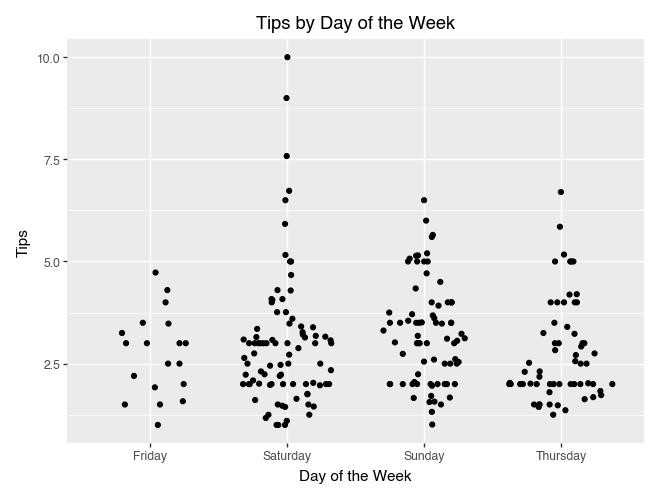

In [42]:
# --- Plot 1: Boxplot ---
print(
    ggplot(tips, aes(x='Weekday', y='Tip'))
    + geom_boxplot()
    + labs(title="Tips by Day of the Week", x="Day of the Week", y="Tips")
)

# --- Plot 2: Boxplot + Jitter ---
print(
    ggplot(tips, aes(x='Weekday', y='Tip'))
    + geom_boxplot(outlier_shape=None) # Hide outliers so they aren't plotted twice
    + geom_jitter(width=0.2)
    + labs(title="Tips by Day of the Week", x="Day of the Week", y="Tips")
)

# --- Plot 3: Violin ---
(
    ggplot(tips, aes(x='Weekday', y='Tip'))
    + geom_violin()
    + labs(title="Tips by Day of the Week", x="Day of the Week", y="Tips")
)

# --- Plot 4: Sina Equivalent ---
# geom_sina() does not exist in Plotnine yet. 
# We simulate it by overlaying jittered points on a violin.
(
    ggplot(tips, aes(x='Weekday', y='Tip'))
    + geom_sina()
    + labs(title="Tips by Day of the Week", x="Day of the Week", y="Tips")
)